#### Import the libraries required for the EDA

In [214]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [215]:
test_df = pd.read_csv("C:\\Users\\UPPI\\Documents\\Netzwerk\\ML Assign#1\\test.csv")
train_df = pd.read_csv("C:\\Users\\UPPI\\Documents\\Netzwerk\\ML Assign#1\\train.csv")

#### Show the data present in the train data set of Titanic

In [216]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [217]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Find the statistical summary of the train data set

In [218]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### It tells us that there are 891 passenger and 38.38% of them Survived the crash and age varies from 0.42 to 80.

In [219]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### It tells us that we have incorrect or missing data for Age, Cabin and Embarked. The Embarked feature has only 2 missing values, which can easily be filled. The ‘Age’ feature, which has 177 missing values is diffucult to fill. The ‘Cabin’ feature needs to drop it from the dataset, since 77 % of it are missing.

#### Dimensions of train: (891, 12) 

#### Dimensions of test: (418, 11)

In [220]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### Understanding the Titanic disaster and specifically what variables might affect the outcome of survival is important

#### I believe that Age, Sex, Embarked and PClass may be good predictors of survival. Now lets visualize the data for the same.

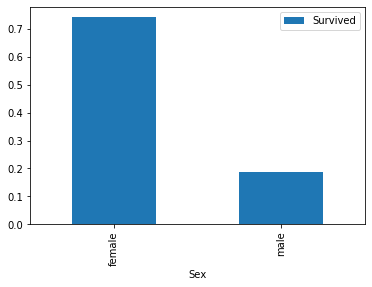

In [221]:
#Lets look at the influence of the 'Sex' Feature in the survival
sex_pivot = train_df.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar()
plt.show()

#### This plot tells us that female have greater chance of survival. So 'Sex' would be one of the predictor of survival. 

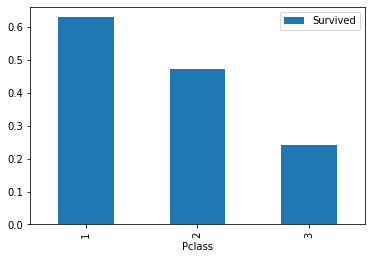

In [222]:
#Lets look at the influence of the 'Pclass' Feature in the survival
class_pivot = train_df.pivot_table(index="Pclass",values="Survived")
class_pivot.plot.bar()
plt.show()

#### This plot tells us that the survival rate is greater for class 1 and lesser for class 2 and least for class 3. So 'Pclass' is also a predictor of the survival


In [223]:
#Lets look at the influence of the 'Age' Feature in the survival
train_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [224]:
#As we can see that the Age is a continous number. The best way of representing this would be with the help of histograms. 

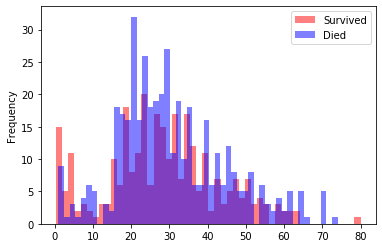

In [225]:
survived = train_df[train_df["Survived"] == 1]
died = train_df[train_df["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

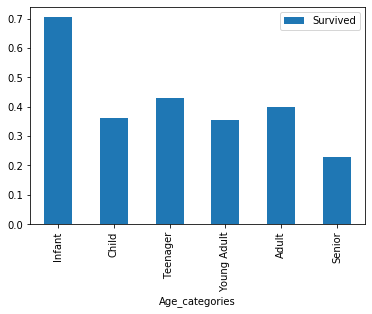

In [226]:
#Above plot doesn't give the clear indormation about the survial rate. We will classify the age into several category and try to visualize it.
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(df['Age'].median())
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [0,5,12,18,35,60,100]
label_names = ["Infant","Child","Teenager","Young Adult","Adult","Senior"]
train = process_age(train_df,cut_points,label_names)
test = process_age(test_df,cut_points,label_names)

pivot = train.pivot_table(index="Age_categories",values='Survived')
pivot.plot.bar()
plt.show()

#### We can see that Infants have a very high survival rate.

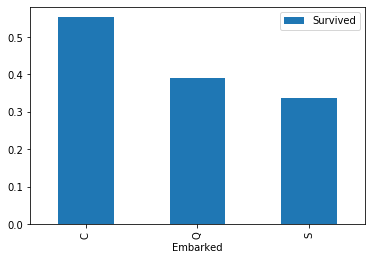

In [227]:
#Lets look at the influence of the 'Embarked' Feature in the survival
sex_pivot = train_df.pivot_table(index="Embarked",values="Survived")
sex_pivot.plot.bar()
plt.show()

#### The people starting at the port of Cherbourg has the high rate of survival

In [228]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

for column in ["Pclass"]:
    train = create_dummies(train_df,column)
    test = create_dummies(test_df,column)

In [229]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Young Adult,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Young Adult,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,Young Adult,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Young Adult,1,0,0


In [230]:
train.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
Age_categories      0
Pclass_1            0
Pclass_2            0
Pclass_3            0
dtype: int64

In [231]:
#Filling up the Null valus of Embarked as 'S' as most of them fall under S
train["Embarked"] = train["Embarked"].fillna("S")

test["Embarked"] = test["Embarked"].fillna("S")

In [232]:
test["Age"] = test["Age"].fillna(test['Age'].median())
test["Fare"] = test["Fare"].fillna(0)

In [233]:
# Converting Age and Fare into Int variable
data = [train, test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].astype(int)
    dataset['Age'] = dataset['Age'].astype(int)

In [234]:
# Converting Sex into numeric values
genders = {"male": 0, "female": 1}
data = [train, test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [235]:
# Converting Embarked into numberic values
ports = {"S": 0, "C": 1, "Q": 2}
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [236]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7,NaN,0,Young Adult,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71,C85,1,Adult,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7,NaN,0,Young Adult,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53,C123,0,Young Adult,1,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8,NaN,0,Young Adult,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27,0,0,211536,13,NaN,0,Young Adult,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19,0,0,112053,30,B42,0,Young Adult,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28,1,2,W./C. 6607,23,NaN,0,Young Adult,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26,0,0,111369,30,C148,1,Young Adult,1,0,0


In [237]:
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

In [238]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_categories,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7,0,Young Adult,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71,1,Adult,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7,0,Young Adult,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53,0,Young Adult,1,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,8,0,Young Adult,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27,0,0,13,0,Young Adult,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19,0,0,30,0,Young Adult,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28,1,2,23,0,Young Adult,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26,0,0,30,1,Young Adult,1,0,0


# Logistic Regression Model

In [239]:
# Create a list of columns which you need to pass to train
columns = ['Sex','Age','Embarked','Pclass_1', 'Pclass_2', 'Pclass_3']

lr = LogisticRegression(solver='lbfgs')
lr.fit(train[columns], train["Survived"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [240]:
#Training the model using Logistic regression
holdout = test 

all_X = train[columns]
all_y = train['Survived']

train_X, test_X, train_y, test_y = train_test_split( all_X, all_y, test_size=0.20,random_state=0)

lr = LogisticRegression(solver='lbfgs')
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)
accuracy = accuracy_score(test_y, predictions)

print(predictions)
print(accuracy)

[0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0
 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]
0.7988826815642458


In [241]:
# Presdicting the output of the test data
lr2 = LogisticRegression(solver='lbfgs')
lr2.fit(all_X,all_y)
holdout_predictions = lr2.predict(holdout[columns])
print(holdout_predictions)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [244]:
#Converting Sex back to Male and Female
genders = {0:"male", 1:"female"}
data = [holdout]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)
holdout_ids = holdout["Sex"]
submission_df = {"Gender": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)
submission

,Gender,Survived
0,male,0
1,female,0
2,male,0
3,male,0
4,female,1
...,...,...
413,male,0
414,female,1
415,male,0
416,male,0


In [245]:
submission.to_csv("assignment_1.csv",index=False)